Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics


Loading dataset

In [3]:
data_read=pd.read_csv("CarPrice.csv")
data_read


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
data_read.head(10)
data_read.tail(10)

data_read.info()
data_read.describe()
data_read.size
data_read.shape

data_read.isnull().sum
data_read.duplicated().sum()
data_read.columns


print(data_read.fueltype.value_counts())
print(data_read.aspiration.value_counts())
print(data_read.doornumber.value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

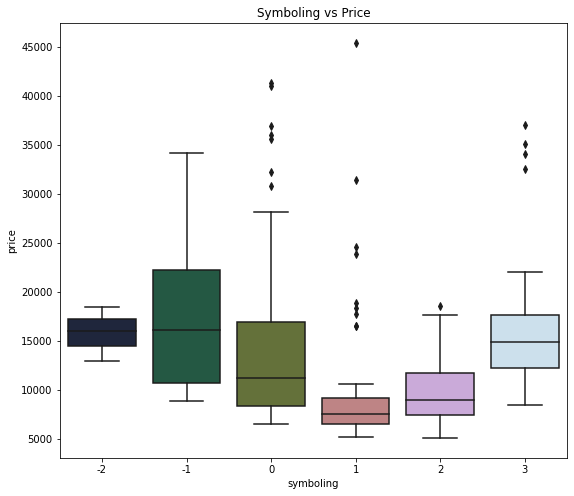

     car_ID  symboling                   CarName  wheelbase  carlength  \
0         1          3        alfa-romero giulia       88.6      168.8   
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...  \
0        64.1       48.8        2548       

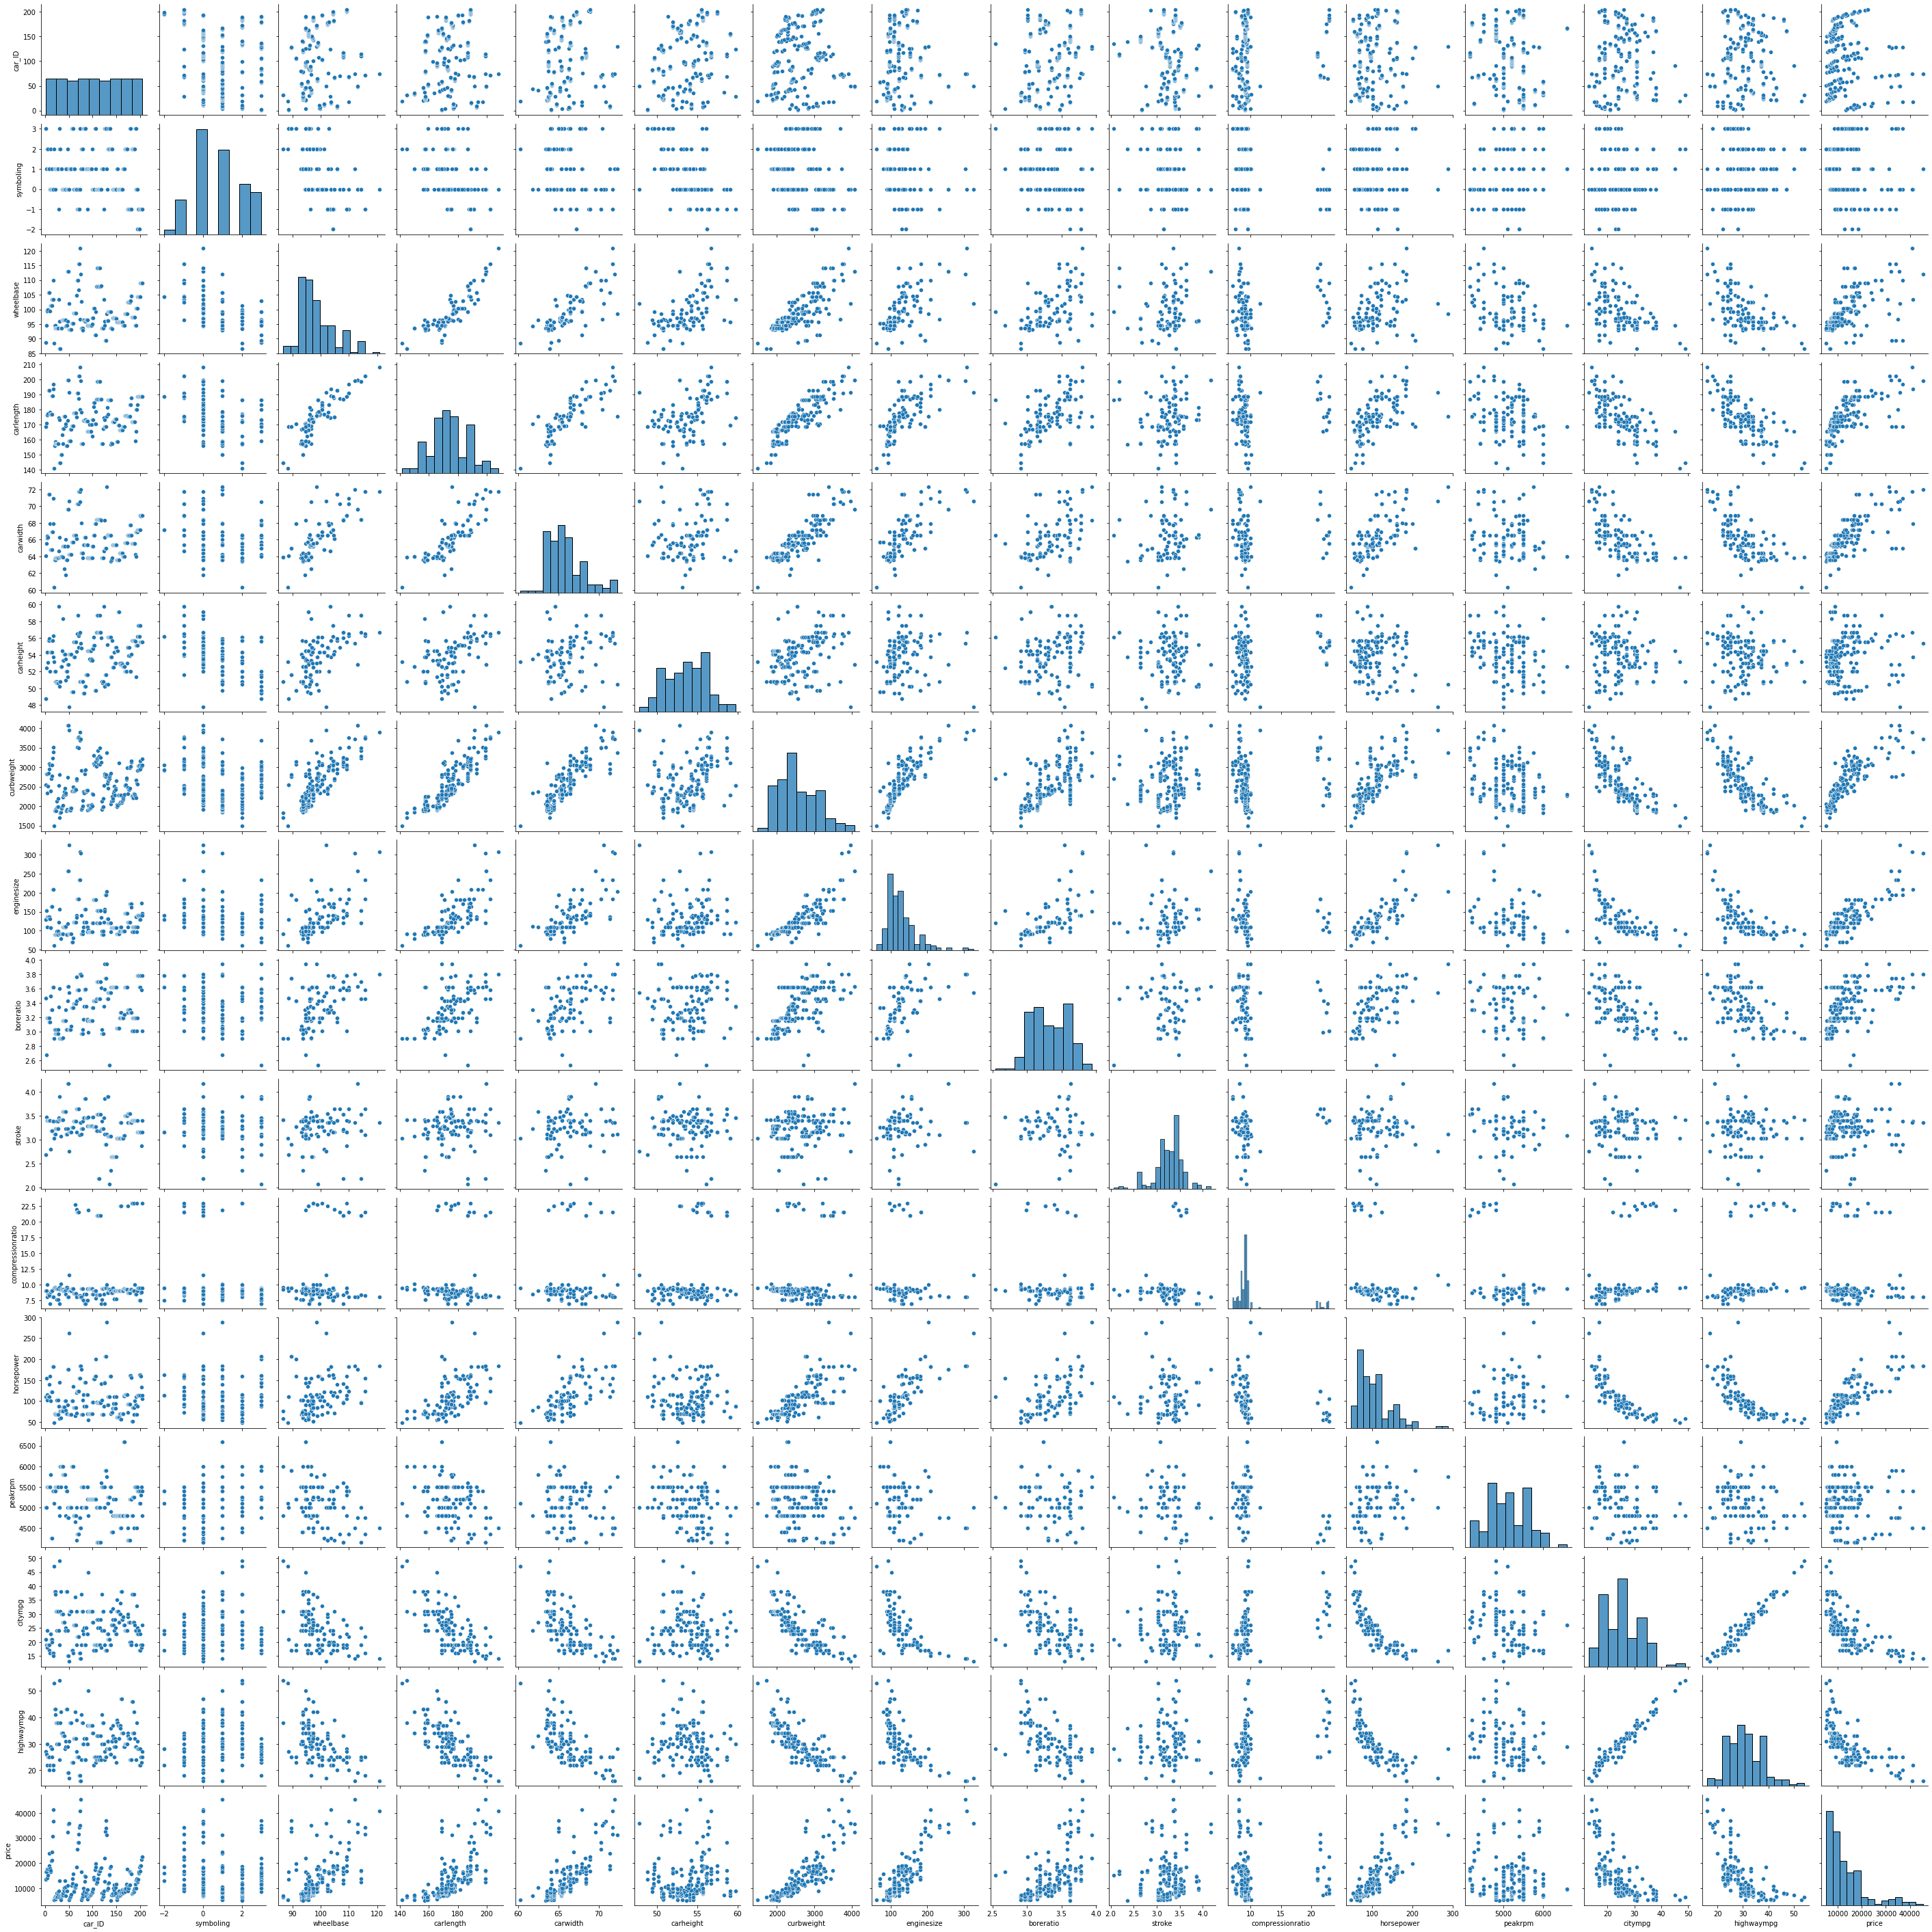

In [5]:
pt.figure(figsize=(20,8))
pt.subplot(1,2,2)
pt.title('Symboling vs Price')
sb.boxplot(x=data_read.symboling, y=data_read.price, palette=("cubehelix"))

pt.show()

sb.pairplot(data_read)

data_read = pd.get_dummies(data_read, columns = ['fueltype','aspiration','doornumber','carbody','drivewheel','cylindernumber','enginelocation','enginetype', 'fuelsystem'])
print(data_read)

x = data_read.drop(['CarName','price'],axis=1)
y = data_read[['price']]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=50)


Model 

In [6]:
model = LinearRegression()
model.fit(xtrain,ytrain)

ypredt= model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest,ypredt)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest,ypredt)
print('Mean_squared_error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

RSquared = r2_score(ytest,ypredt)
print('R-Squared:',RSquared)

AdjRsquared = 1-((1-RSquared)*(len(xtest)-1)/(len(xtest)-len(x.columns)-1))
print('AdjRsquared:',AdjRsquared)

ypred=model.predict(xtrain)

Mean_absolute_error = mean_absolute_error(ytrain,ypred)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytrain,ypred)
print('Mean_squared_error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:',Root_Mean_squared_error)

RSquared = r2_score(ytrain,ypred)
print('R-Squared:',RSquared)

AdjRsquared = 1-((1-RSquared)*(len(xtrain)-1)/(len(xtrain)-len(x.columns)-1))
print('AdjRsquared:',AdjRsquared)

print("Accuracy",(RSquared)*100)

Mean_absolute_error: 1730.630245659982
Mean_squared_error: 4760383.629075978
Root_Mean_squared_error: 2181.830339205131
R-Squared: 0.9027139470421022
AdjRsquared: 3.4807943504263945
Mean_absolute_error: 1312.154665143382
Mean_squared_error: 3304722.7637419915
Root_Mean_squared_error: 1817.8896456446391
R-Squared: 0.9513827776280662
AdjRsquared: 0.9253553757521825
Accuracy 95.13827776280662
